## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('TextMsgs.csv')

In [4]:
print(dataset)

                                                 Text
0   Severe food poisoning alert: A recent meal lef...
1   Urgent warning: Multiple reports of severe vom...
2   Health hazard confirmed: Numerous cases of foo...
3   Received a message indicating severe stomach p...
4   Severe health hazard identified: Experiencing ...
..                                                ...
85  Restaurant nightmare! Food poisoning struck, c...
86  Terrible decision! Dealt with food poisoning, ...
87  Absolute disaster! Food poisoning aftermath: s...
88  Never again! Confronted food poisoning, brutal...
89  Dreadful dining adventure! Food poisoning cons...

[90 rows x 1 columns]


## Cleaning the texts

In [5]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 90):
    texts = re.sub('[^a-zA-Z]', ' ', dataset['Text'][i])  # replacing special characters with a whitespace
    texts = texts.lower()  # Converting the text to lowercase
    texts = texts.split()  # Splitting each text into different words
    ps = PorterStemmer()   # Stemming - taking the root of the word
    all_stopwords = stopwords.words('english')
    texts = [ps.stem(word) if word[-3:] != 'ing' else word for word in texts if not word in set(all_stopwords)]
    texts = ' '.join(texts)
    corpus.append(texts)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
print(corpus)

['sever food poisoning alert recent meal left stomach cramp strongli advis avoiding place', 'urgent warning multipl report sever vomiting post dinner crucial steer clear restaur', 'health hazard confirm numer case food poisoning local spot caution highli advis friend', 'receiv messag indicating sever stomach pain food poisoning cautiou avoid specif restaur', 'sever health hazard identifi experiencing stomach cramp sign food poisoning strongli discourag dining place', 'weekend plan disrupt due sever health hazard favorit spot multipl food poisoning case report', 'emerg alert sever vomiting issu report dining essenti stay clear particular eateri', 'multipl case food poisoning report health hazard crucial heed warning avoid restaur', 'health hazard alert sever symptom food poisoning report urgent caution requir anyon planning dine', 'health hazard identifi sever stomach pain food poisoning brunch place recommend dining', 'urgent messag sever health hazard identifi variou eateri multipl ca

## Bag of Words model to group similar texts together

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [8]:
print(X)

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 1 1 0]
 [0 0 1 ... 0 0 0]
 ...
 [1 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 1 0 ... 1 1 0]]


## Kmeans Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

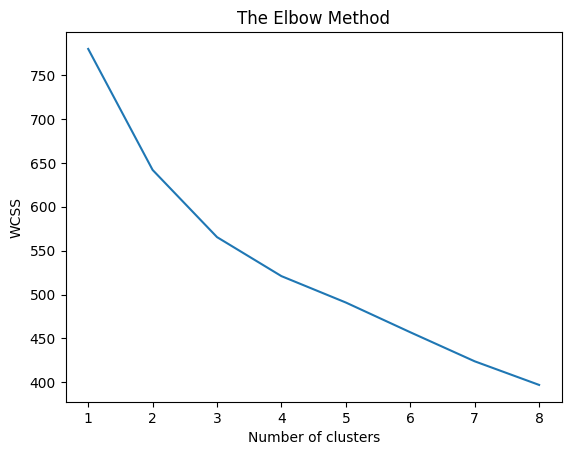

In [9]:
from sklearn.cluster import KMeans
wcss = []  #within cluster sum of squares. Finds the sm of squares of the distance between the centroid and the actual point in the cluster
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
from sklearn.cluster import KMeans
k = 3 #From the elbow method graph. This will differ for different datsets
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)  #fit will train the model and assign each data pointnt to its closest cluster. Predict will predict the cluster labels and store it in cluster
dataset['Cluster'] = clusters   # cluster labels added in the dataset
print("Cluster Assignments:")
print(dataset[['Text', 'Cluster']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Assignments:
                                                 Text  Cluster
0   Severe food poisoning alert: A recent meal lef...        0
1   Urgent warning: Multiple reports of severe vom...        2
2   Health hazard confirmed: Numerous cases of foo...        1
3   Received a message indicating severe stomach p...        0
4   Severe health hazard identified: Experiencing ...        0
..                                                ...      ...
85  Restaurant nightmare! Food poisoning struck, c...        0
86  Terrible decision! Dealt with food poisoning, ...        0
87  Absolute disaster! Food poisoning aftermath: s...        0
88  Never again! Confronted food poisoning, brutal...        0
89  Dreadful dining adventure! Food poisoning cons...        0

[90 rows x 2 columns]


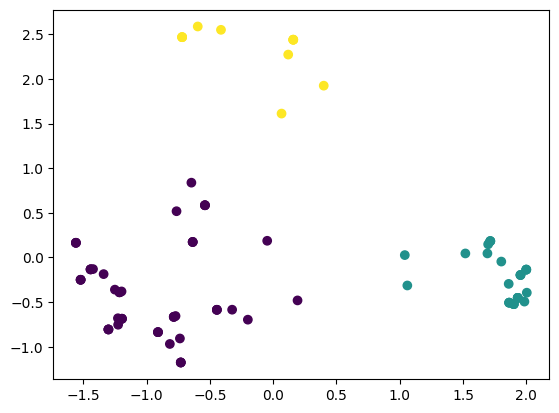

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reducedData = pca.fit_transform(X)
plt.scatter(reducedData[:, 0], reducedData[:, 1], c=clusters)
plt.show()

In [44]:
for clusternum in range(k):
    clusteredtexts = dataset[dataset['Cluster'] == clusternum]['Text']#this will contain all the texts pertaining to that particular cluster number
    print(f"Cluster {clusternum} Texts:")
    print(clusteredtexts)
    print("\n")

Cluster 0 Texts:
0     Severe food poisoning alert: A recent meal lef...
3     Received a message indicating severe stomach p...
4     Severe health hazard identified: Experiencing ...
9     Health hazard identified: Severe stomach pain ...
15    Received news about stomach pain and food pois...
22    Received a message about stomach cramps and fo...
25    Severe stomach pain and food poisoning after a...
32    Received a message about stomach cramps and fo...
35    Severe stomach pain and food poisoning after a...
42    Received a message about stomach cramps and fo...
45    Severe stomach pain and food poisoning after a...
50    Disaster on a plate! Food poisoning hit me lik...
51    Regrettable choice! The aftermath: food poison...
52    Unpleasant surprise! Food poisoning struck, ca...
53    Terrible experience! Suffered from food poison...
54    Avoid this spot! Fell victim to food poisoning...
55    Nightmare in a restaurant! Food poisoning, exc...
56    Awful decision! Battled f

In [49]:
food_poisoning_keywords=['food poisoning']
contains=0
notcontains=0
for clusternum in range(k):
    clusteredtexts = dataset[dataset['Cluster'] == clusternum]['Text']
    contains_food_poisoning = any(any(keyword.lower() in text.lower() for keyword in food_poisoning_keywords) for text in clusteredtexts)
    if contains_food_poisoning:
        print(f"\nCluster {clusternum} likely contains food poisoning incidents.")
        print(f"The number of texts in cluster {clusternum} is: ", len(clusteredtexts))
        contains+=len(clusteredtexts)
    else:
        print(f"\nCluster {clusternum} does not seem to be related to food poisoning.")
        print(f"The number of texts in cluster {clusternum} is: ", len(clusteredtexts))
        notcontains+=len(clusteredtexts)
print("\nTherefore, out of 90 text messages atmost", contains, "texts contain food poisoning complaints")


Cluster 0 likely contains food poisoning incidents.
The number of texts in cluster 0 is:  51

Cluster 1 likely contains food poisoning incidents.
The number of texts in cluster 1 is:  28

Cluster 2 does not seem to be related to food poisoning.
The number of texts in cluster 2 is:  11

Therefore, out of 90 text messages atmost 79 texts contain food poisoning complaints
